# Keras랑 친해지기
[케라스 창시자에게 배우는 딥러닝](https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/)에 있는 내용을 조금 변형했습니다.

### Keras 버젼 확인은?

In [1]:
import tensorflow.keras as keras
keras.__version__

'2.2.4-tf'

### 머신러닝에서의 Hello World인 MNIST 데이터 이용하기

- 문제
    - 흑백 손글씨 숫자 이미지(28x28 픽셀)를 10개의 범주(0에서 9까지)로 분류
    - MNIST Dataset : 머신 러닝의 역사만큼 오래되었고 많은 연구에 사용 됨. 이 데이터셋은 1980년대에 미국 국립표준기술연구소에서 수집한 6만 개의 훈련 이미지와 1만 개의 테스트 이미지로 구성되어 있음. 

MNIST 데이터셋은 넘파이 배열 형태로 케라스에 이미 포함되어 있습니다:

In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 36s 3us/step


- Training Set 
    - `train_images` : 손글씨 숫자
    - `train_labels` : 정답
- Test Set
    - `test_images` : 손글씨 숫자
    - `test_labels` : 정답 

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

다음은 테스트 데이터입니다:

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

다섯 번째 샘플을 맷플롯립 라이브러리를 사용해 확인해 보겠습니다.

In [9]:
import matplotlib.pyplot as plt

In [14]:
digit = train_images[4]

In [16]:
train_labels[4]

9

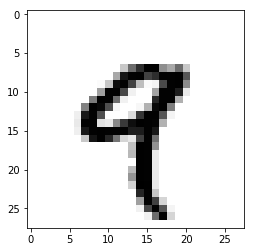

In [15]:
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

작업 순서는 다음과 같습니다. 먼저 훈련 데이터 `train_images`와 `train_labels`를 네트워크에 주입합니다. 그러면 네트워크는 이미지와 레이블을 연관시킬 수 있도록 학습됩니다. 마지막으로 `test_images`에 대한 예측을 네트워크에게 요청합니다. 그리고 이 예측이 `test_labels`와 맞는지 확인할 것입니다.

신경망을 만들어 보겠습니다. 여기에서도 다음 코드를 완전히 이해하지 않아도 괜찮습니다.

### Keras를 이용하여 네트워크를 만드는 방법
- Sequential model을 이용하여 쌓는 방법

```Python
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)), # 입력이 784이고 32개의 뉴런을 갖는 FC(Fully connectd) 레이어
    Activation('relu'), # 이어지는 Relu Activation
    Dense(10), # 이어지는 10개의 뉴런을 갖는 FC레이어
    Activation('softmax'), # 이어지는 Softmax activation
])
```

또는 `add`를 이용하여 쌓을 수 있습니다.

```Python
model = Sequential()
model.add(Dense(32, input_dim=784)) # 입력이 784d이고 32개의 뉴런을 갖는 FC레이어
model.add(Activation('relu')) # 이어지는 Relu Activation

```

- Functional API를 적용하는 방법 : 복잡한 모델을 만들기 용이함. 그래프를 그리듯이 만들 수 있음.

```Python
from keras.layers import Input, Dense
from keras.models import Model

# This returns a tensor
inputs = Input(shape=(784,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64, activation='relu')(inputs) # 마치 그래프를 그리듯이 만들 수 있음, 뒤에다 붙임
x = Dense(64, activation='relu')(x) 
predictions = Dense(10, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions) # 입력과 아웃풋을 Model에 알려주어서 만듦
```


### MNIST 데이터 분류하기 실습 (코딩시작)
- Sequetial model의 add를 이용하여 레이어를 쌓는 실습을 해봅니다. 주석의 번호를 잘 맞춰서 해야할 일을 수행해 주세요. None을 채우시면 됩니다.
- 1) 첫번째 FC레이어를 추가합니다. 512개의 뉴럴이며 activation은 'relu'를 사용합니다. 입력의 크기는 28*28의 크기로 입력합니다 (주의 : Tuple이 입력으로 들어갑니다))
- 2) 두번째 FC레이어, 10개의 뉴런, 'softmax' activaiton

In [17]:
##### from keras import models
from tensorflow.keras import layers

network = keras.models.Sequential()
## 코드작성 ##
# 1) 512 뉴런, relu, 28*28
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))

# 2) 10개의 뉴런, softmax activation
network.add(layers.Dense(10, activation='softmax'))
## 코드 끝 ##

신경망의 핵심 구성 요소는 일종의 데이터 처리 필터라고 생각할 수 있는 층입니다. 어떤 데이터가 들어가면 더 유용한 형태로 출력됩니다. 조금 더 구체적으로 층은 주어진 문제에 더 의미 있는 표현을 입력된 데이터로부터 추출합니다. 대부분의 딥러닝은 간단한 층을 연결하여 구성되어 있고, 점진적으로 데이터를 정제하는 형태를 띠고 있습니다. 딥러닝 모델은 데이터 정제 필터(층)가 연속되어 있는 데이터 프로세싱을 위한 여과기와 같습니다.

이 예에서는 조밀하게 연결된 (또는 완전 연결된) 신경망 층인 `Dense` 층 2개가 연속되어 있습니다. 두 번째 (즉, 마지막) 층은 10개의 확률 점수가 들어 있는 배열(모두 더하면 1입니다)을 반환하는 소프트맥스 층입니다. 각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률입니다.

신경망이 훈련 준비를 마치기 위해서 컴파일 단계에 포함될 세 가지가 더 필요합니다:

* 손실 함수 : 훈련 데이터에서 신경망의 성능을 측정하는 방법으로 네트워크가 옳은 방향으로 학습될 수 있도록 도와 줍니다.
* 옵티마이저: 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘입니다.
* 훈련과 테스트 과정을 모니터링할 지표 : 여기에서는 정확도(정확히 분류된 이미지의 비율)만 고려하겠습니다.

옵티마이저는 저희가 다음 시간에 배우게 될 내용입니다. 여기서는 우리가 배웠던 Gradient Descent를 좀 더 효과적으로 해줄 수 있는 방법이라고 생각하시고 일단 넘어가시면 됩니다.

In [18]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# one-hot vector로 만들기 위해서는 'categorical_crossentropy' loss를 사용해야함

훈련을 시작하기 전에 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일을 조정합니다. 예를 들어, 앞서 우리의 훈련 이미지는 `[0, 255]` 사이의 값인 `uint8` 타입의 `(60000, 28, 28)` 크기를 가진 배열로 저장되어 있습니다. 이 데이터를 0과 1 사이의 값을 가지는 `float32` 타입의 `(60000, 28 * 28)` 크기의 배열로 바꿉니다.

In [41]:
# image를 1열로 나열하는 과정
train_images = train_images.reshape((60000, 28 * 28))
# image 화소값을 0~1로 맵핑하는 과정
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## to_categorical 친해지기
- 레이블을 one hot 벡터로 변형합니다. 이때 사용할 수 것은 [to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) 입니다.
- 아래의 코드 a는 10개의 레이블 중 세개를 랜덤하게 선택한 결과입니다

In [24]:
import numpy as np
from tensorflow.keras.utils import to_categorical
np.random.seed(8)
a = np.random.choice(10,3)
print(a)

[3 4 1]


### 코딩 시작

위의 3개의 index를 원핫 벡터로 바꿔 보세요. 결과의 shape은 (3,10) 되어야 합니다
**None을 채우세요**

In [26]:
### 코딩 시작 ###
#to_categorical 함수를 이용하여 One-Hot encoding 실행, 3 -> [0,0,0,1,0,0,0,0,0,0]
my_onehot = to_categorical(a,10)
### 코딩 끝 ###

In [ ]:
print(my_onehot.shape) # 결과가 (3,10)이 되어야 합니다
print(my_onehot)

**예상되는 결과물**
```Python
(3, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
```



### 실습 : MNIST LABEL 원핫벡터로 만들기
**to_categorical**을 이용하여 레이블을 one hot vector로 변경하세요. None을 채우시면 됩니다.

In [38]:
train_labels.shape

(60000, 10)

In [39]:
test_labels.shape

(10000, 10)

In [29]:
from tensorflow.keras.utils import to_categorical
#### 코드시작 ####
train_labels = to_categorical(train_labels,10) # None을 채우세요
test_labels = to_categorical(test_labels,10) # None을 채우세요
#### 코드 끝 ####

이제 신경망을 훈련시킬 준비가 되었습니다. 케라스에서는 `fit` 메서드를 호출하여 훈련 데이터에 모델을 학습시킵니다:

model을 학습시킬때는 [fit](https://keras.io/models/model/)을 이용합니다. 자세한 설명은 클릭해서 확인하세요. 

### 코딩 시작 (None을 채우세요)

다음을 설정해 보세요
- 학습 데이터 : train_images
- 학습 레이블 : train_labels
- epochs : 5 번으로 설정
- batch size : 128로 설정

*Hint* : `cmd(ctrl)+tab`을 이용해서 함수에 들어가야 할 것들의 정보를 얻고 그대로 구현하세요. 위에 나온 4가지만 넣어주고 나머지는 default로 돌리시면 됩니다.

In [40]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [43]:
#model.fit(X, Y, epochs=200, batch_size=10)
network.fit(train_images, train_labels, epochs=20, batch_size=10)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 24s 393us/sample - loss: 0.0779 - accuracy: 0.9854
Epoch 2/20
60000/60000 [==============================] - 24s 392us/sample - loss: 0.0684 - accuracy: 0.9874
Epoch 3/20
60000/60000 [==============================] - 24s 393us/sample - loss: 0.0608 - accuracy: 0.9889
Epoch 4/20
60000/60000 [==============================] - 24s 398us/sample - loss: 0.0541 - accuracy: 0.9906
Epoch 5/20
60000/60000 [==============================] - 25s 413us/sample - loss: 0.0452 - accuracy: 0.9923
Epoch 6/20
60000/60000 [==============================] - 24s 399us/sample - loss: 0.0413 - accuracy: 0.9929
Epoch 7/20
60000/60000 [==============================] - 24s 393us/sample - loss: 0.0367 - accuracy: 0.9937
Epoch 8/20
60000/60000 [==============================] - 24s 396us/sample - loss: 0.0317 - accuracy: 0.9945
Epoch 9/20
60000/60000 [==============================] - 24s 401us/sample - loss: 0.0313 - accuracy: 0.9

훈련하는 동안 두 개의 정보가 출력됩니다. 훈련 데이터에 대한 네트워크의 손실과 정확도입니다.

훈련 데이터에 대해 0.989(98.9%)의 정확도를 금방 달성합니다. 이제 테스트 세트에서도 모델이 잘 작동하는지 확인해 보겠습니다:

In [44]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [45]:
print('test_acc:', test_acc)

test_acc: 0.9798


테스트 세트의 정확도는 97.8%로 나왔습니다. 훈련 세트 정확도보다는 약간 낮습니다. 훈련 정확도와 테스트 정확도 사이의 차이는 과대적합 때문입니다. 이는 머신 러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 경향을 말합니다. 이는 추후 배우게 될 예정입니다.

감사합니다.

과적합으로 예상되어 epoch 수를 줄여서 진행... 엥? 덮어씌움

In [46]:
network.fit(train_images, train_labels, epochs=3, batch_size=10, verbose=1)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 24s 396us/sample - loss: 0.0061 - accuracy: 0.9989
Epoch 2/3
60000/60000 [==============================] - 24s 395us/sample - loss: 0.0051 - accuracy: 0.9990
Epoch 3/3
60000/60000 [==============================] - 24s 393us/sample - loss: 0.0050 - accuracy: 0.9991


In [47]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [48]:
print('test_acc:', test_acc)

test_acc: 0.9799


In [49]:
network.save('mnist_epoch5.h5')

Jupyter_Notebook Tip

In [50]:
whos

Variable         Type           Data/Info
-----------------------------------------
a                ndarray        3: 3 elems, type `int32`, 12 bytes
digit            ndarray        28x28: 784 elems, type `uint8`, 784 bytes
keras            _LazyLoader    <module 'tensorflow_core.<...>_v2\\keras\\__init__.py'>
layers           module         <module 'tensorflow_core.<...>as\\layers\\__init__.py'>
mnist            module         <module 'tensorflow.keras<...>ets\\mnist\\__init__.py'>
my_onehot        ndarray        3x10: 30 elems, type `float32`, 120 bytes
network          Sequential     <tensorflow.python.keras.<...>ct at 0x00000214617C7AC8>
np               module         <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
plt              module         <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
test_acc         float32        0.9799
test_images      ndarray        10000x784: 7840000 elems, type `float32`, 31360000 bytes (29.9072265625 Mb)
test_labels      ndarray  

In [ ]:
del val

In [51]:
who

a	 digit	 keras	 layers	 mnist	 my_onehot	 network	 np	 plt	 
test_acc	 test_images	 test_labels	 test_loss	 to_categorical	 train_images	 train_labels	 


In [ ]:
%qtconsole